In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정 (Apple 기본 폰트인 'AppleGothic' 사용)
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기 및 형태 확인하기

### 1.1 데이터 불러오기

In [3]:
train = pd.read_csv("../data/train.csv") # data/ 폴더에 있을 경우
test = pd.read_csv("../data/test.csv")

### 1.2 데이터 확인

In [4]:
print(train.shape)

(891, 12)


In [5]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 데이터 분포 확인 및 특성 공학

### 2.1 성별에 따른 생존자 분포 확인

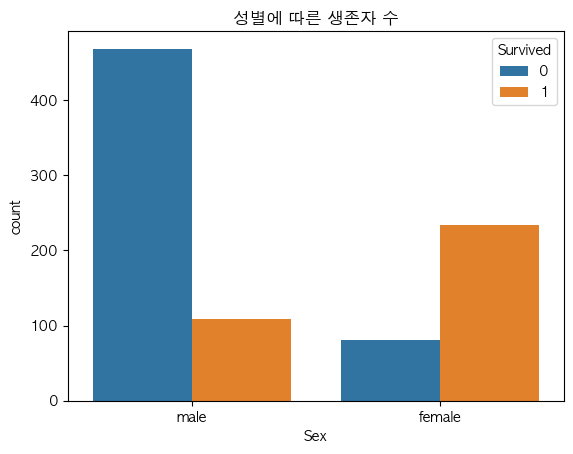

In [8]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("성별에 따른 생존자 수")
plt.show()

### 2.2 Pclass(객실 등급)별 생존자 수

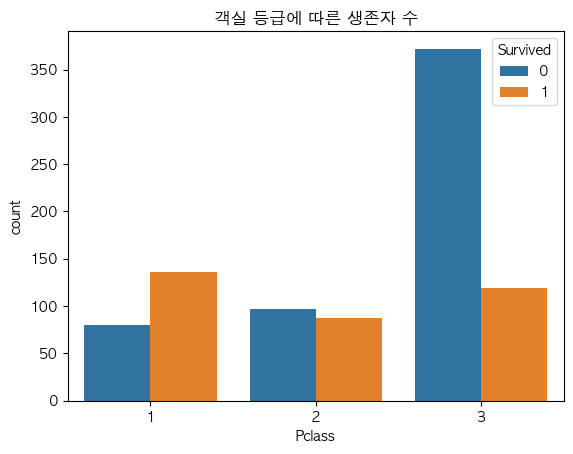

In [9]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("객실 등급에 따른 생존자 수")
plt.show()

### 2.3 나이 분포에 따른 생존율

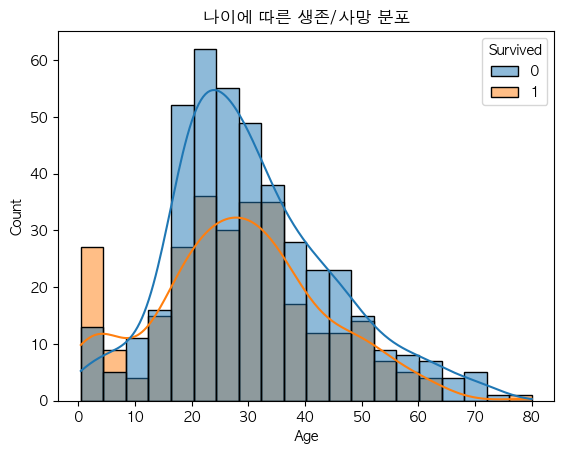

In [10]:
sns.histplot(data=train, x='Age', hue='Survived', bins=20, kde=True, )
plt.title("나이에 따른 생존/사망 분포")
plt.show()

### 2.4 Fare(요금) 분포 + 생존 여부

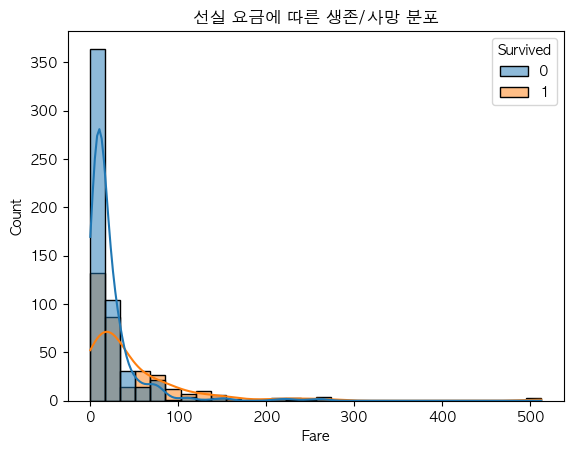

In [11]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("선실 요금에 따른 생존/사망 분포")
plt.show()

### 2.5 결측치 확인 - 전체 결측치 개수 확인

In [12]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 2.6 결측치 처리

In [13]:
# 2.6.1 Age 결측치 처리 - 중앙값으로 채우기
train['Age'] = train['Age'].fillna(train['Age'].median())

# 2.6.2 Cabin(선실 번호) 결측치 처리 - 삭제 : 선실 위치가 구조에 영향 줄 수도 있지만, 결측이 너무 많음
train.drop('Cabin', axis=1, inplace=True)

# 2.6.3 Embarked(탑승 항구) 결측치 처리 : 최빈값(Mode)로 대체
# 최빈값 구하기
most_freq = train['Embarked'].mode()[0]
# 결측치 채우기
train['Embarked'] = train['Embarked'].fillna(most_freq)

In [14]:
# 결측치 다시 확인
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 3. 범주형 변수 인코딩(Sex, Embarked 등)

In [15]:
# 3.1.1 Sex(성별) - male -> 0, female -> 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
# 3.1.2 Embarked(탑승 항구) - S,C,Q를 원-핫 인코딩(One-Hot Encoding)을 사용해서 변환
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True) 
# Embarked_C는 없어도 알수 있기에 drop_first를 통해 사라짐, 있으면 다중공선성이라는 이슈가 생김
# 다중 공선성 - 중복되는 정보를 가진 특성은 데이터 예측에 혼란을 줄 수 있다는 특징

In [16]:
# 결과 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


## 4. 로지스틱 회귀(Logistic Regression)로 모델 훈련

### 4.1 사용할 특성만 추리기(Feature 선택)

In [17]:
X = train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = train['Survived']

### 4.2 데이터 분리(학습용/테스트용)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

### 4.3 로지스틱 회귀 모델 학습

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 4.4 정확도 평가

In [20]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.8101


## 5. test.csv 예측 및 Kaggle 제출 파일 만들기

### 5.1 test.csv 전처리 파일 만들기

In [21]:
test = pd.read_csv("../data/test.csv")
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [22]:
test.isnull().sum() # 결측치 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
# 결측치 처리 (train과 동일)
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.drop('Cabin', axis=1, inplace=True)

In [24]:
# 범주형 변수 처리하기
# Sex(성별) - male -> 0, female -> 1
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
# Embarked(탑승 항구) - S,C,Q를 원-핫 인코딩(One-Hot Encoding)을 사용해서 변환
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True) 
# Embarked_C는 없어도 알수 있기에 drop_first를 통해 사라짐, 있으면 다중공선성이라는 이슈가 생김
# 다중 공선성 - 중복되는 정보를 가진 특성은 데이터 예측에 혼란을 줄 수 있다는 특징

In [28]:
# 불필요한 열 삭제하기
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_Q   418 non-null    bool   
 8   Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 23.8 KB


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,True,False
1,893,3,1,47.0,1,0,7.0000,False,True
2,894,2,0,62.0,0,0,9.6875,True,False
3,895,3,0,27.0,0,0,8.6625,False,True
4,896,3,1,22.0,1,1,12.2875,False,True


In [31]:
for col in ['Embarked_Q', 'Embarked_S']:  # 모델이 꼭 필요로 하는 두 칸
    if col not in test.columns:           # test에 그 칸이 없으면
        test[col] = 0                     # 새 칸 만들고 값은 0으로 채워 넣기

In [32]:
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

In [33]:
# 예측
test_prediction = model.predict(X_test)

### 5.2 제출용 파일 만들기

In [35]:
# 제출용 DataFrame 만들기
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_prediction
})

In [36]:
# csv 저장
submission.to_csv('submission.csv', index = False)
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [41]:
import os
print(os.listdir('.'))
print(os.listdir('../data'))

['titanic_eda.ipynb', 'submission.csv', '.ipynb_checkpoints']
['test.csv', 'train.csv', 'gender_submission.csv']


In [42]:
import os

def show_tree(start_path='.', depth=2):
    for root, dirs, files in os.walk(start_path):
        level = root.replace(start_path, '').count(os.sep)
        if level > depth:      # depth 넘어가면 스킵
            continue
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")

show_tree('.', depth=2)   # 현재 폴더부터 하위 2단계까지만 출력

./
    titanic_eda.ipynb
    submission.csv
    .ipynb_checkpoints/
        titanic_eda-checkpoint.ipynb


## 6. 파생 변수 추가해서 성능 높여보기

In [76]:
# ----------------------------------------
# 1) 파생 변수 추가 ─ FamilySize · IsAlone
# ----------------------------------------
for df in (train, test):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1          # 본인(+1)까지 포함
    df['IsAlone']    = (df['FamilySize'] == 1).astype(int)    # 혼자면 1, 아니면 0

# ----------------------------------------
# 2) Feature 목록 갱신
# ----------------------------------------
features = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
    'Embarked_Q', 'Embarked_S',        # 기존 원-핫
    'FamilySize', 'IsAlone'            # 새 파생 변수
]

X      = train[features]
X_test = test[features]
y      = train['Survived']

# ----------------------------------------
# 3) 데이터 분리 & 모델 재학습
# ----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_tr, y_tr)

val_pred = model.predict(X_val)
print("새 검증 정확도 :", accuracy_score(y_val, val_pred))

# ----------------------------------------
# 4) 제출 파일 다시 만들기
# ----------------------------------------
test_pred = model.predict(X_test)

submission = (
    test[['PassengerId']]
    .assign(Survived=test_pred.astype(int))
)

submission.to_csv('submission_fs.csv', index=False)
print("submission_fs.csv 저장 완료 ✅")

새 검증 정확도 : 0.7988826815642458
submission_fs.csv 저장 완료 ✅


## 7. 모델 변경(랜덤 포레스트)으로 성능 높여보기

### 7.1 기본 설정 - 전처리 및 파생변수 그대로

In [89]:
features = [
    'Pclass','Sex','Age','SibSp','Parch','Fare',
    'Embarked_Q','Embarked_S',
]

X      = train[features]
y      = train['Survived']
X_test = test[features]

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score

rf = RandomForestClassifier(
        n_estimators=300,      # 트리 개수
        max_depth=None,        # 자동
        random_state=42,
        n_jobs=-1)             # 모든 코어 사용

rf.fit(X_tr, y_tr)
val_pred = rf.predict(X_val)
print("RF 검증 정확도 :", accuracy_score(y_val, val_pred))

# 2️⃣ 빠른 튜닝 2-라인 (오버핏 억제)
# depth·leaf를 조여 주면 Kaggle 점수가 바로 0.77~0.79대까지 회복하는 경우 존재
rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=5,             # 깊이 제한
        min_samples_leaf=3,      # 잎 노드 최소 샘플
        class_weight="balanced", # 불균형 보정
        random_state=42,
        n_jobs=-1)
rf.fit(X_tr, y_tr)
val_pred = rf.predict(X_val)
print("RF 검증 정확도 :", accuracy_score(y_val, val_pred))

RF 검증 정확도 : 0.8212290502793296
RF 검증 정확도 : 0.7988826815642458


In [91]:
# Kaggle 제출 파일 만들기
best_model = rf   # 또는 gb, 정확도 높은 쪽

test_pred = best_model.predict(X_test)
submission = test[['PassengerId']].assign(Survived=test_pred.astype(int))
submission.to_csv('submission_rf.csv', index=False)

### 7.2 파생 변수 추가 설정

In [92]:
features = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
    'Embarked_Q', 'Embarked_S',        # 기존 원-핫
    'FamilySize', 'IsAlone'            # 새 파생 변수
]
X      = train[features]
y      = train['Survived']
X_test = test[features]

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score

rf = RandomForestClassifier(
        n_estimators=300,      # 트리 개수
        max_depth=None,        # 자동
        random_state=42,
        n_jobs=-1)             # 모든 코어 사용

rf.fit(X_tr, y_tr)
val_pred = rf.predict(X_val)
print("RF 검증 정확도 :", accuracy_score(y_val, val_pred))

# 2️⃣ 빠른 튜닝 2-라인 (오버핏 억제)
# depth·leaf를 조여 주면 Kaggle 점수가 바로 0.77~0.79대까지 회복하는 경우 존재
rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=5,             # 깊이 제한
        min_samples_leaf=3,      # 잎 노드 최소 샘플
        class_weight="balanced", # 불균형 보정
        random_state=42,
        n_jobs=-1)
rf.fit(X_tr, y_tr)
val_pred = rf.predict(X_val)
print("RF 검증 정확도 :", accuracy_score(y_val, val_pred))

RF 검증 정확도 : 0.8268156424581006
RF 검증 정확도 : 0.8100558659217877


In [94]:
# Kaggle 제출 파일 만들기
best_model = rf   # 또는 gb, 정확도 높은 쪽

test_pred = best_model.predict(X_test)
submission = test[['PassengerId']].assign(Survived=test_pred.astype(int))
submission.to_csv('submission_rf_fs.csv', index=False)

## 8. 모델 변경(Gradient Boosting, GB)으로 성능 개선해보기

In [97]:
gb = GradientBoostingClassifier(
        n_estimators=400,     # 더 많은 얕은 트리
        learning_rate=0.03,   # 학습률 낮춰 과적합 억제
        max_depth=2,          # 트리 깊이 제한
        subsample=0.8,        # 각 트리 학습에 샘플 80%만 사용
        random_state=42)
gb.fit(X_tr, y_tr)
print("GB 튜닝 검증:", gb.score(X_val, y_val))


GB 튜닝 검증: 0.8324022346368715


In [98]:
# Kaggle 제출 파일 만들기
best_model = gb   # 또는 gb, 정확도 높은 쪽

test_pred = best_model.predict(X_test)
submission = test[['PassengerId']].assign(Survived=test_pred.astype(int))
submission.to_csv('submission_gb.csv', index=False)

## 9. 모델 변경(XGBoost)으로 성능 개선해보기

In [99]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss')      # 필수: 경고 방지
xgb.fit(X_tr, y_tr)
print("XGB 검증 :", xgb.score(X_val, y_val))

XGB 검증 : 0.7821229050279329


In [104]:
# Kaggle 제출 파일 만들기
test_pred = xgb.predict(X_test)
submission = test[['PassengerId']].assign(Survived=test_pred.astype(int))
submission.to_csv('submission_xgb.csv', index=False)